## Goal: examine distribution of distances between different sets of novel SSs and their closest v47 SS
Goes with `td_personal_get_ss_beds.ipynb`

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

## Personalized GRCh38s (all novel)

In [14]:
# get closest entry from novel sss to known sss
nov_ss_df = pr.read_bed('person_hap_nov_ss.bed')
temp = pr.read_bed('test_v47_ss.bed')

df = nov_ss_df.nearest(temp, strandedness=False)
df = df.df

8.17% (29456/360601) of novel personalized haplotype SJs are w/i 12bp of an annotated one


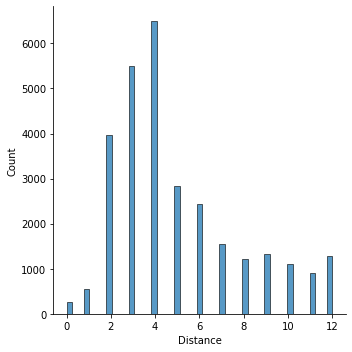

In [15]:
# what % of these are w/i 12 bp of an annotated one
dist = 12
assert len(df.loc[df.Distance<0]) == 0 # no neg. dists
n_num = len(df.loc[df.Distance<=dist].index)
n = len(df.index)
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of novel personalized haplotype SJs are w/i {dist}bp of an annotated one')

temp = df.loc[df.Distance <= dist]
ax = sns.displot(temp, 
            kind='hist',
            x='Distance')

62.88% (226744/360601) of novel personalized haplotype SJs are w/i 1000bp of an annotated one


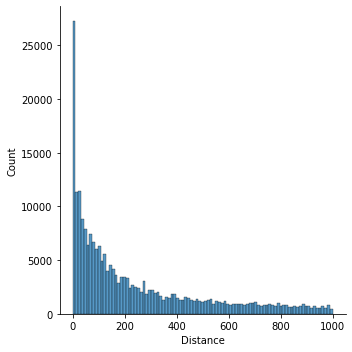

In [16]:
# what % of these are w/i 1000 bp of an annotated one
dist = 1000
assert len(df.loc[df.Distance<0]) == 0 # no neg. dists
n_num = len(df.loc[df.Distance<=dist].index)
n = len(df.index)
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of novel personalized haplotype SJs are w/i {dist}bp of an annotated one')

temp = df.loc[df.Distance <= dist]
ax = sns.displot(temp, 
            kind='hist',
            x='Distance')

The distance at which 99% of observations are under is: 40880.0
The distance at which 90% of observations are under is: 8081.0
The distance at which 80% of observations are under is: 3302.0
The distance at which 75% of observations are under is: 2321.0
The distance at which 70% of observations are under is: 1604.0


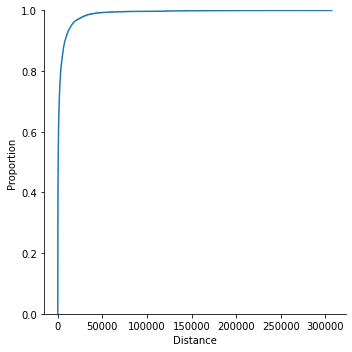

In [20]:
# ecdf
ax = sns.displot(df, 
            kind='ecdf',
            x='Distance')

# some quantiles
for perc in [99, 90, 80, 75, 70]:

    # calc the dist. value at the Nth percentile
    dist_thresh = df['Distance'].quantile(perc / 100)

    print(f"The distance at which {perc}% of observations are under is: {dist_thresh}")

## Personalized GRCh38s (novel and absent from hg38)


In [21]:
# get closest entry from novel sss to known sss
nov_ss_df = pr.read_bed('person_hap_nov_ss_hg38_absent.bed')
temp = pr.read_bed('test_v47_ss.bed')

df = nov_ss_df.nearest(temp, strandedness=False)
df = df.df

7.64% (969/12685) of novel personalized haplotype SJs are w/i 12bp of an annotated one


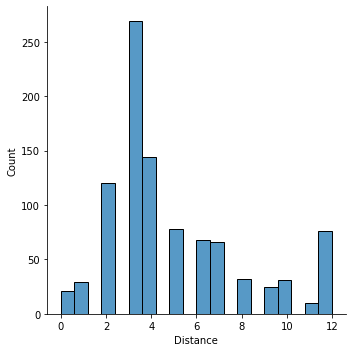

In [22]:
# what % of these are w/i 12 bp of an annotated one
dist = 12
assert len(df.loc[df.Distance<0]) == 0 # no neg. dists
n_num = len(df.loc[df.Distance<=dist].index)
n = len(df.index)
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of novel personalized haplotype SJs are w/i {dist}bp of an annotated one')

temp = df.loc[df.Distance <= dist]
ax = sns.displot(temp, 
            kind='hist',
            x='Distance')

63.13% (8008/12685) of novel personalized haplotype SJs are w/i 1000bp of an annotated one


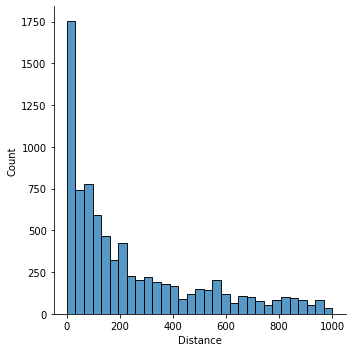

In [23]:
# what % of these are w/i 1000 bp of an annotated one
dist = 1000
assert len(df.loc[df.Distance<0]) == 0 # no neg. dists
n_num = len(df.loc[df.Distance<=dist].index)
n = len(df.index)
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of novel personalized haplotype SJs are w/i {dist}bp of an annotated one')

temp = df.loc[df.Distance <= dist]
ax = sns.displot(temp, 
            kind='hist',
            x='Distance')

The distance at which 99% of observations are under is: 37961.39999999995
The distance at which 90% of observations are under is: 6476.0
The distance at which 80% of observations are under is: 2845.2000000000007
The distance at which 75% of observations are under is: 2024.0
The distance at which 70% of observations are under is: 1481.7999999999993


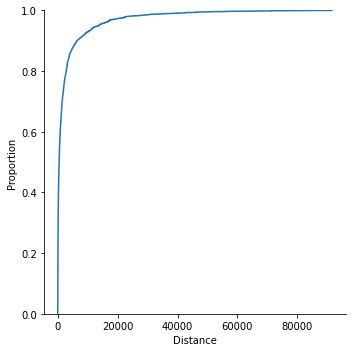

In [24]:
# ecdf
ax = sns.displot(df, 
            kind='ecdf',
            x='Distance')

# some quantiles
for perc in [99, 90, 80, 75, 70]:

    # calc the dist. value at the Nth percentile
    dist_thresh = df['Distance'].quantile(perc / 100)

    print(f"The distance at which {perc}% of observations are under is: {dist_thresh}")

## PODER

In [25]:
# get closest entry from novel sss to known sss
nov_ss_df = pr.read_bed('poder_nov_ss.bed')
temp = pr.read_bed('test_v47_ss.bed')

df = nov_ss_df.nearest(temp, strandedness=False)
df = df.df

7.73% (2160/27957) of novel personalized haplotype SJs are w/i 12bp of an annotated one


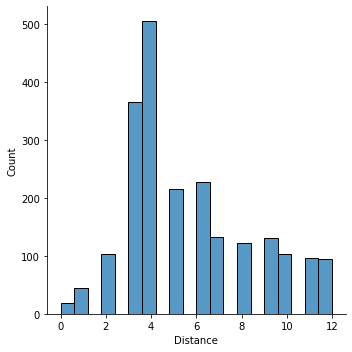

In [26]:
# what % of these are w/i 12 bp of an annotated one
dist = 12
assert len(df.loc[df.Distance<0]) == 0 # no neg. dists
n_num = len(df.loc[df.Distance<=dist].index)
n = len(df.index)
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of novel personalized haplotype SJs are w/i {dist}bp of an annotated one')

temp = df.loc[df.Distance <= dist]
ax = sns.displot(temp, 
            kind='hist',
            x='Distance')

62.69% (17527/27957) of novel personalized haplotype SJs are w/i 1000bp of an annotated one


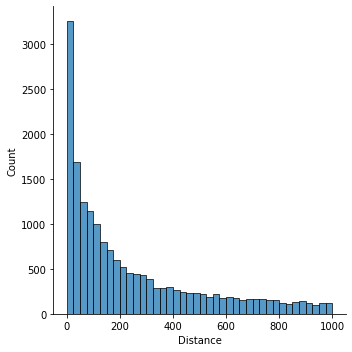

In [27]:
# what % of these are w/i 1000 bp of an annotated one
dist = 1000
assert len(df.loc[df.Distance<0]) == 0 # no neg. dists
n_num = len(df.loc[df.Distance<=dist].index)
n = len(df.index)
print(f'{(n_num/n)*100:.2f}% ({n_num}/{n}) of novel personalized haplotype SJs are w/i {dist}bp of an annotated one')

temp = df.loc[df.Distance <= dist]
ax = sns.displot(temp, 
            kind='hist',
            x='Distance')

The distance at which 99% of observations are under is: 51160.679999999935
The distance at which 90% of observations are under is: 8812.400000000001
The distance at which 80% of observations are under is: 3536.0
The distance at which 75% of observations are under is: 2409.0
The distance at which 70% of observations are under is: 1643.199999999997


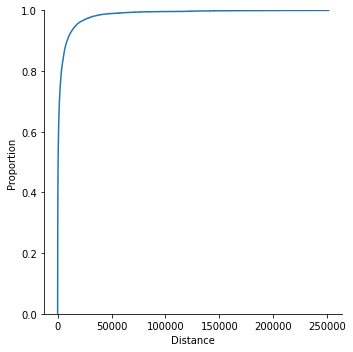

In [28]:
# ecdf
ax = sns.displot(df, 
            kind='ecdf',
            x='Distance')

# some quantiles
for perc in [99, 90, 80, 75, 70]:

    # calc the dist. value at the Nth percentile
    dist_thresh = df['Distance'].quantile(perc / 100)

    print(f"The distance at which {perc}% of observations are under is: {dist_thresh}")